In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install yfinance

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# from sklearn.metrics import precision_score
# from sklearn.metrics import precision_recall_curve
# from sklearn.metrics import accuracy_score

# from treeinterpreter import treeinterpreter as ti
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import classification_report,confusion_matrix

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [10]:
import yfinance as yf

data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = "GME",

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "60d",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "30m",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = False,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )

data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Datetime,,,,,
2020-12-23 09:30:00-05:00,20.170000,21.000000,19.129999,20.940100,4300883
2020-12-23 10:00:00-05:00,20.950001,22.349899,20.910000,21.770000,5183023
2020-12-23 10:30:00-05:00,21.790001,21.969999,20.629999,20.710300,2562895
2020-12-23 11:00:00-05:00,20.719999,21.279900,20.500000,21.240000,1406174
2020-12-23 11:30:00-05:00,21.264999,22.030001,21.250000,21.652000,2164532
...,...,...,...,...,...
2021-03-22 13:30:00-04:00,187.979996,195.979996,187.860001,191.520004,484528
2021-03-22 14:00:00-04:00,191.150101,197.156693,191.150101,193.699997,860701
2021-03-22 14:30:00-04:00,194.000000,196.279999,192.820007,195.139999,339514


In [11]:
prices = data.reset_index()
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775 entries, 0 to 774
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype                           
---  ------    --------------  -----                           
 0   Datetime  775 non-null    datetime64[ns, America/New_York]
 1   Open      775 non-null    float64                         
 2   High      775 non-null    float64                         
 3   Low       775 non-null    float64                         
 4   Close     775 non-null    float64                         
 5   Volume    775 non-null    int64                           
dtypes: datetime64[ns, America/New_York](1), float64(4), int64(1)
memory usage: 36.5 KB


In [12]:
prices['Datetime'] = prices['Datetime'].astype(str)

In [13]:
#remove -5:00
prices['Datetime'] = prices['Datetime'].str.replace('-05:00',"")

In [14]:
prices = prices[(prices['Datetime']>= '2021-02-15 09:30:00') & (prices['Datetime']<='2021-03-12 15:30:00')]
prices

,Datetime,Open,High,Low,Close,Volume
450,2021-02-16 09:30:00,53.110401,53.500000,51.049999,51.389999,1405196
451,2021-02-16 10:00:00,51.369999,52.869999,50.412300,51.110001,1080749
452,2021-02-16 10:30:00,51.200001,51.340000,49.810001,50.500000,798887
453,2021-02-16 11:00:00,50.540001,50.849998,49.840000,50.000000,522663
454,2021-02-16 11:30:00,49.900002,50.599998,49.509998,49.610001,516266
...,...,...,...,...,...,...
692,2021-03-12 13:30:00,268.450012,277.000000,267.850006,275.140015,1203669
693,2021-03-12 14:00:00,275.035492,278.149994,273.000000,273.600006,900530
694,2021-03-12 14:30:00,273.510010,281.690002,273.100006,278.700012,1053829
695,2021-03-12 15:00:00,278.950012,279.380005,267.029999,271.480011,1598509


In [15]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 450 to 696
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Datetime  247 non-null    object 
 1   Open      247 non-null    float64
 2   High      247 non-null    float64
 3   Low       247 non-null    float64
 4   Close     247 non-null    float64
 5   Volume    247 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 13.5+ KB


In [16]:
sentiment = pd.read_csv('/content/drive/MyDrive/FA PROJECT 2021/Correlation/Gamestop/gamestop_tweets_1Month.csv')
sentiment.head()

,Datetime,Text,processed_tweet
0,2021-02-15 00:00:03+00:00,Roaring Kitty to testify on GameStop alongside...,roaring kitty to testify on gamestop alongside...
1,2021-02-15 00:00:04+00:00,"""It's a lot more than just the money. I'm goin...",its a lot more than just the money im going to...
2,2021-02-15 00:00:57+00:00,Even Gamestop won't take Nba Live 19 🤒 https:/...,even gamestop wont take nba live
3,2021-02-15 00:02:01+00:00,Stocks are rigged \nGamestop \nHousing rigged ...,stocks are rigged gamestop housing rigged poli...
4,2021-02-15 00:02:14+00:00,SEC says it will punish ‘abusive activity’ ami...,sec says it will punish abusive activity amid ...


In [17]:
sentiment = sentiment.rename(columns={'Datetime': 'created_at'})

In [19]:
#remove +00:00
sentiment['created_at'] = sentiment['created_at'].str.slice(0,19)

In [20]:
sentiment.head()

,created_at,Text,processed_tweet
0,2021-02-15 00:00:03,Roaring Kitty to testify on GameStop alongside...,roaring kitty to testify on gamestop alongside...
1,2021-02-15 00:00:04,"""It's a lot more than just the money. I'm goin...",its a lot more than just the money im going to...
2,2021-02-15 00:00:57,Even Gamestop won't take Nba Live 19 🤒 https:/...,even gamestop wont take nba live
3,2021-02-15 00:02:01,Stocks are rigged \nGamestop \nHousing rigged ...,stocks are rigged gamestop housing rigged poli...
4,2021-02-15 00:02:14,SEC says it will punish ‘abusive activity’ ami...,sec says it will punish abusive activity amid ...


In [21]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116715 entries, 0 to 116714
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   created_at       116715 non-null  object
 1   Text             116715 non-null  object
 2   processed_tweet  116715 non-null  object
dtypes: object(3)
memory usage: 2.7+ MB


In [22]:
# convert datetime and created at to same datetime object
prices['Datetime'] = pd.to_datetime(prices['Datetime'])
sentiment['created_at'] = pd.to_datetime(sentiment['created_at'])

In [23]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 450 to 696
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Datetime  247 non-null    datetime64[ns]
 1   Open      247 non-null    float64       
 2   High      247 non-null    float64       
 3   Low       247 non-null    float64       
 4   Close     247 non-null    float64       
 5   Volume    247 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 13.5 KB


In [24]:
prices

,Datetime,Open,High,Low,Close,Volume
450,2021-02-16 09:30:00,53.110401,53.500000,51.049999,51.389999,1405196
451,2021-02-16 10:00:00,51.369999,52.869999,50.412300,51.110001,1080749
452,2021-02-16 10:30:00,51.200001,51.340000,49.810001,50.500000,798887
453,2021-02-16 11:00:00,50.540001,50.849998,49.840000,50.000000,522663
454,2021-02-16 11:30:00,49.900002,50.599998,49.509998,49.610001,516266
...,...,...,...,...,...,...
692,2021-03-12 13:30:00,268.450012,277.000000,267.850006,275.140015,1203669
693,2021-03-12 14:00:00,275.035492,278.149994,273.000000,273.600006,900530
694,2021-03-12 14:30:00,273.510010,281.690002,273.100006,278.700012,1053829
695,2021-03-12 15:00:00,278.950012,279.380005,267.029999,271.480011,1598509


In [25]:
# only close column is needed
prices = prices.drop(columns=['Open','High','Low','Volume'])

In [26]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116715 entries, 0 to 116714
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   created_at       116715 non-null  datetime64[ns]
 1   Text             116715 non-null  object        
 2   processed_tweet  116715 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 2.7+ MB


In [27]:
sentiment

,created_at,Text,processed_tweet
0,2021-02-15 00:00:03,Roaring Kitty to testify on GameStop alongside...,roaring kitty to testify on gamestop alongside...
1,2021-02-15 00:00:04,"""It's a lot more than just the money. I'm goin...",its a lot more than just the money im going to...
2,2021-02-15 00:00:57,Even Gamestop won't take Nba Live 19 🤒 https:/...,even gamestop wont take nba live
3,2021-02-15 00:02:01,Stocks are rigged \nGamestop \nHousing rigged ...,stocks are rigged gamestop housing rigged poli...
4,2021-02-15 00:02:14,SEC says it will punish ‘abusive activity’ ami...,sec says it will punish abusive activity amid ...
...,...,...,...
116710,2021-03-12 23:57:06,Direct Deposit: +1400\n\nMe at GameStop: I wan...,direct deposit me at gamestop i want jim ryan ...
116711,2021-03-12 23:57:19,*1400 stimulus hits* \n\nGame stop: the PlaySt...,stimulus hits game stop the playstation is sti...
116712,2021-03-12 23:57:25,just went to a gamestop and they barely sell d...,just went to a gamestop and they barely sell d...
116713,2021-03-12 23:58:42,@GameStop Posted right after the market closed...,posted right after the market closed gme clos...


In [28]:
sentiment = sentiment.rename(columns={'created_at': 'Datetime'})
sentiment

,Datetime,Text,processed_tweet
0,2021-02-15 00:00:03,Roaring Kitty to testify on GameStop alongside...,roaring kitty to testify on gamestop alongside...
1,2021-02-15 00:00:04,"""It's a lot more than just the money. I'm goin...",its a lot more than just the money im going to...
2,2021-02-15 00:00:57,Even Gamestop won't take Nba Live 19 🤒 https:/...,even gamestop wont take nba live
3,2021-02-15 00:02:01,Stocks are rigged \nGamestop \nHousing rigged ...,stocks are rigged gamestop housing rigged poli...
4,2021-02-15 00:02:14,SEC says it will punish ‘abusive activity’ ami...,sec says it will punish abusive activity amid ...
...,...,...,...
116710,2021-03-12 23:57:06,Direct Deposit: +1400\n\nMe at GameStop: I wan...,direct deposit me at gamestop i want jim ryan ...
116711,2021-03-12 23:57:19,*1400 stimulus hits* \n\nGame stop: the PlaySt...,stimulus hits game stop the playstation is sti...
116712,2021-03-12 23:57:25,just went to a gamestop and they barely sell d...,just went to a gamestop and they barely sell d...
116713,2021-03-12 23:58:42,@GameStop Posted right after the market closed...,posted right after the market closed gme clos...


In [29]:
# drop na of sentiment
sentiment = sentiment.dropna()

In [30]:
df_merge = pd.merge_asof(sentiment,prices,left_on='Datetime',right_on="Datetime",direction='backward')
df_merge

,Datetime,Text,processed_tweet,Close
0,2021-02-15 00:00:03,Roaring Kitty to testify on GameStop alongside...,roaring kitty to testify on gamestop alongside...,NaN
1,2021-02-15 00:00:04,"""It's a lot more than just the money. I'm goin...",its a lot more than just the money im going to...,NaN
2,2021-02-15 00:00:57,Even Gamestop won't take Nba Live 19 🤒 https:/...,even gamestop wont take nba live,NaN
3,2021-02-15 00:02:01,Stocks are rigged \nGamestop \nHousing rigged ...,stocks are rigged gamestop housing rigged poli...,NaN
4,2021-02-15 00:02:14,SEC says it will punish ‘abusive activity’ ami...,sec says it will punish abusive activity amid ...,NaN
...,...,...,...,...
116710,2021-03-12 23:57:06,Direct Deposit: +1400\n\nMe at GameStop: I wan...,direct deposit me at gamestop i want jim ryan ...,264.458893
116711,2021-03-12 23:57:19,*1400 stimulus hits* \n\nGame stop: the PlaySt...,stimulus hits game stop the playstation is sti...,264.458893
116712,2021-03-12 23:57:25,just went to a gamestop and they barely sell d...,just went to a gamestop and they barely sell d...,264.458893
116713,2021-03-12 23:58:42,@GameStop Posted right after the market closed...,posted right after the market closed gme clos...,264.458893


In [31]:
df_merge1 = df_merge[df_merge.Close.notnull()]
df_merge1

,Datetime,Text,processed_tweet,Close
4048,2021-02-16 09:30:00,#GameStop hasn’t been the only David in this D...,gamestop hasnt been the only david in this dav...,51.389999
4049,2021-02-16 09:30:01,Does what happened with GameStop &amp; WallStr...,does what happened with gamestop amp wallstree...,51.389999
4050,2021-02-16 09:31:01,Reddit raises millions. Aunt Jemima gets a new...,reddit raises millions aunt jemima gets a new ...,51.389999
4051,2021-02-16 09:32:02,Start Up No.1486: GameStop saga prompts federa...,start up no gamestop saga prompts federal inve...,51.389999
4052,2021-02-16 09:34:01,"""Georgia was a fiasco"": McConnell indicates he...",georgia was a fiasco mcconnell indicates he ma...,51.389999
...,...,...,...,...
116710,2021-03-12 23:57:06,Direct Deposit: +1400\n\nMe at GameStop: I wan...,direct deposit me at gamestop i want jim ryan ...,264.458893
116711,2021-03-12 23:57:19,*1400 stimulus hits* \n\nGame stop: the PlaySt...,stimulus hits game stop the playstation is sti...,264.458893
116712,2021-03-12 23:57:25,just went to a gamestop and they barely sell d...,just went to a gamestop and they barely sell d...,264.458893
116713,2021-03-12 23:58:42,@GameStop Posted right after the market closed...,posted right after the market closed gme clos...,264.458893


In [32]:
df_15feb = df_merge1[(df_merge1['Datetime']<='2021-02-15 15:30:00') & (df_merge1['Datetime']>='2021-02-15 09:00:00')]
df_16feb = df_merge1[(df_merge1['Datetime']<='2021-02-16 15:30:00') & (df_merge1['Datetime']>='2021-02-16 09:00:00')]
df_17feb = df_merge1[(df_merge1['Datetime']<='2021-02-17 15:30:00') & (df_merge1['Datetime']>='2021-02-17 09:00:00')]
df_18feb = df_merge1[(df_merge1['Datetime']<='2021-02-18 15:30:00') & (df_merge1['Datetime']>='2021-02-28 09:00:00')]
df_19feb = df_merge1[(df_merge1['Datetime']<='2021-02-19 15:30:00') & (df_merge1['Datetime']>='2021-02-19 09:00:00')]

df_22feb = df_merge1[(df_merge1['Datetime']<='2021-02-22 15:30:00') & (df_merge1['Datetime']>='2021-02-22 09:00:00')]
df_23feb = df_merge1[(df_merge1['Datetime']<='2021-02-23 15:30:00') & (df_merge1['Datetime']>='2021-02-23 09:00:00')]
df_24feb = df_merge1[(df_merge1['Datetime']<='2021-02-24 15:30:00') & (df_merge1['Datetime']>='2021-02-24 09:00:00')]
df_25feb = df_merge1[(df_merge1['Datetime']<='2021-02-25 15:30:00') & (df_merge1['Datetime']>='2021-02-25 09:00:00')]
df_26feb = df_merge1[(df_merge1['Datetime']<='2021-02-26 15:30:00') & (df_merge1['Datetime']>='2021-02-26 09:00:00')]

df_1mar = df_merge1[(df_merge1['Datetime']<='2021-03-01 15:30:00') & (df_merge1['Datetime']>='2021-03-01 09:00:00')]
df_2mar = df_merge1[(df_merge1['Datetime']<='2021-03-02 15:30:00') & (df_merge1['Datetime']>='2021-03-02 09:00:00')]
df_3mar = df_merge1[(df_merge1['Datetime']<='2021-03-03 15:30:00') & (df_merge1['Datetime']>='2021-03-03 09:00:00')]
df_4mar = df_merge1[(df_merge1['Datetime']<='2021-03-04 15:30:00') & (df_merge1['Datetime']>='2021-03-04 09:00:00')]
df_5mar = df_merge1[(df_merge1['Datetime']<='2021-03-05 15:30:00') & (df_merge1['Datetime']>='2021-03-05 09:00:00')]

df_8mar = df_merge1[(df_merge1['Datetime']<='2021-03-08 15:30:00') & (df_merge1['Datetime']>='2021-03-08 09:00:00')]
df_9mar = df_merge1[(df_merge1['Datetime']<='2021-03-09 15:30:00') & (df_merge1['Datetime']>='2021-03-09 09:00:00')]
df_10mar = df_merge1[(df_merge1['Datetime']<='2021-03-10 15:30:00') & (df_merge1['Datetime']>='2021-03-10 09:00:00')]
df_11mar = df_merge1[(df_merge1['Datetime']<='2021-03-11 15:30:00') & (df_merge1['Datetime']>='2021-03-11 09:00:00')]
df_12mar = df_merge1[(df_merge1['Datetime']<='2021-03-12 15:30:00') & (df_merge1['Datetime']>='2021-03-12 09:00:00')]

In [33]:
frames = [df_15feb,df_16feb,df_17feb,df_18feb, df_19feb, 
          df_22feb,df_23feb,df_24feb,df_25feb,df_26feb,
          df_1mar,df_2mar,df_3mar,df_4mar,df_5mar,
           df_8mar,df_9mar,df_10mar,df_11mar,df_12mar
          ] 

df_final = pd.concat((frames) , axis = 0)
df_final

,Datetime,Text,processed_tweet,Close
4048,2021-02-16 09:30:00,#GameStop hasn’t been the only David in this D...,gamestop hasnt been the only david in this dav...,51.389999
4049,2021-02-16 09:30:01,Does what happened with GameStop &amp; WallStr...,does what happened with gamestop amp wallstree...,51.389999
4050,2021-02-16 09:31:01,Reddit raises millions. Aunt Jemima gets a new...,reddit raises millions aunt jemima gets a new ...,51.389999
4051,2021-02-16 09:32:02,Start Up No.1486: GameStop saga prompts federa...,start up no gamestop saga prompts federal inve...,51.389999
4052,2021-02-16 09:34:01,"""Georgia was a fiasco"": McConnell indicates he...",georgia was a fiasco mcconnell indicates he ma...,51.389999
...,...,...,...,...
114768,2021-03-12 15:28:01,"I rlly try not pull an alsan style ""do not quo...",i rlly try not pull an alsan style do not quot...,271.480011
114769,2021-03-12 15:28:20,$GME #Gamestop $300 is the magic number. Let’s...,gme gamestop is the magic number lets get it,271.480011
114770,2021-03-12 15:28:45,@PS5restocks_etc @Marc1Legit @Walmart I got th...,etc i got this email that says eta marchth bu...,271.480011
114771,2021-03-12 15:29:15,"they were playing a game, stop making it into ...",they were playing a game stop making it into s...,271.480011


In [34]:
df_final = df_final.reset_index(drop=True)
df_final

,Datetime,Text,processed_tweet,Close
0,2021-02-16 09:30:00,#GameStop hasn’t been the only David in this D...,gamestop hasnt been the only david in this dav...,51.389999
1,2021-02-16 09:30:01,Does what happened with GameStop &amp; WallStr...,does what happened with gamestop amp wallstree...,51.389999
2,2021-02-16 09:31:01,Reddit raises millions. Aunt Jemima gets a new...,reddit raises millions aunt jemima gets a new ...,51.389999
3,2021-02-16 09:32:02,Start Up No.1486: GameStop saga prompts federa...,start up no gamestop saga prompts federal inve...,51.389999
4,2021-02-16 09:34:01,"""Georgia was a fiasco"": McConnell indicates he...",georgia was a fiasco mcconnell indicates he ma...,51.389999
...,...,...,...,...
17427,2021-03-12 15:28:01,"I rlly try not pull an alsan style ""do not quo...",i rlly try not pull an alsan style do not quot...,271.480011
17428,2021-03-12 15:28:20,$GME #Gamestop $300 is the magic number. Let’s...,gme gamestop is the magic number lets get it,271.480011
17429,2021-03-12 15:28:45,@PS5restocks_etc @Marc1Legit @Walmart I got th...,etc i got this email that says eta marchth bu...,271.480011
17430,2021-03-12 15:29:15,"they were playing a game, stop making it into ...",they were playing a game stop making it into s...,271.480011


In [35]:
df_final["Comp"] = ''
df_final["Negative"] = ''
df_final["Neutral"] = ''
df_final["Positive"] = ''
df_final

,Datetime,Text,processed_tweet,Close,Comp,Negative,Neutral,Positive
0,2021-02-16 09:30:00,#GameStop hasn’t been the only David in this D...,gamestop hasnt been the only david in this dav...,51.389999,,,,
1,2021-02-16 09:30:01,Does what happened with GameStop &amp; WallStr...,does what happened with gamestop amp wallstree...,51.389999,,,,
2,2021-02-16 09:31:01,Reddit raises millions. Aunt Jemima gets a new...,reddit raises millions aunt jemima gets a new ...,51.389999,,,,
3,2021-02-16 09:32:02,Start Up No.1486: GameStop saga prompts federa...,start up no gamestop saga prompts federal inve...,51.389999,,,,
4,2021-02-16 09:34:01,"""Georgia was a fiasco"": McConnell indicates he...",georgia was a fiasco mcconnell indicates he ma...,51.389999,,,,
...,...,...,...,...,...,...,...,...
17427,2021-03-12 15:28:01,"I rlly try not pull an alsan style ""do not quo...",i rlly try not pull an alsan style do not quot...,271.480011,,,,
17428,2021-03-12 15:28:20,$GME #Gamestop $300 is the magic number. Let’s...,gme gamestop is the magic number lets get it,271.480011,,,,
17429,2021-03-12 15:28:45,@PS5restocks_etc @Marc1Legit @Walmart I got th...,etc i got this email that says eta marchth bu...,271.480011,,,,
17430,2021-03-12 15:29:15,"they were playing a game, stop making it into ...",they were playing a game stop making it into s...,271.480011,,,,


In [36]:
df_final['processed_tweet'] = df_final['processed_tweet'].astype(str)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17432 entries, 0 to 17431
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Datetime         17432 non-null  datetime64[ns]
 1   Text             17432 non-null  object        
 2   processed_tweet  17432 non-null  object        
 3   Close            17432 non-null  float64       
 4   Comp             17432 non-null  object        
 5   Negative         17432 non-null  object        
 6   Neutral          17432 non-null  object        
 7   Positive         17432 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 1.1+ MB


In [37]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
df_final['Comp'] = [analyzer.polarity_scores(x)['compound'] for x in df_final['processed_tweet']]
df_final['Negative'] = [analyzer.polarity_scores(x)['neg'] for x in df_final['processed_tweet']]
df_final['Neutral'] = [analyzer.polarity_scores(x)['neu'] for x in df_final['processed_tweet']]
df_final['Positive'] = [analyzer.polarity_scores(x)['pos'] for x in df_final['processed_tweet']]

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [38]:
df_final

,Datetime,Text,processed_tweet,Close,Comp,Negative,Neutral,Positive
0,2021-02-16 09:30:00,#GameStop hasn’t been the only David in this D...,gamestop hasnt been the only david in this dav...,51.389999,-0.1901,0.089,0.815,0.096
1,2021-02-16 09:30:01,Does what happened with GameStop &amp; WallStr...,does what happened with gamestop amp wallstree...,51.389999,-0.0772,0.070,0.868,0.062
2,2021-02-16 09:31:01,Reddit raises millions. Aunt Jemima gets a new...,reddit raises millions aunt jemima gets a new ...,51.389999,-0.1779,0.080,0.863,0.058
3,2021-02-16 09:32:02,Start Up No.1486: GameStop saga prompts federa...,start up no gamestop saga prompts federal inve...,51.389999,0.3400,0.101,0.734,0.165
4,2021-02-16 09:34:01,"""Georgia was a fiasco"": McConnell indicates he...",georgia was a fiasco mcconnell indicates he ma...,51.389999,-0.6490,0.237,0.634,0.129
...,...,...,...,...,...,...,...,...
17427,2021-03-12 15:28:01,"I rlly try not pull an alsan style ""do not quo...",i rlly try not pull an alsan style do not quot...,271.480011,0.4497,0.081,0.803,0.116
17428,2021-03-12 15:28:20,$GME #Gamestop $300 is the magic number. Let’s...,gme gamestop is the magic number lets get it,271.480011,0.0772,0.000,0.860,0.140
17429,2021-03-12 15:28:45,@PS5restocks_etc @Marc1Legit @Walmart I got th...,etc i got this email that says eta marchth bu...,271.480011,0.0000,0.000,1.000,0.000
17430,2021-03-12 15:29:15,"they were playing a game, stop making it into ...",they were playing a game stop making it into s...,271.480011,-0.3632,0.226,0.680,0.094


% of positive tweets=  41.6647544745296
% of negative tweets=  26.393988067921065


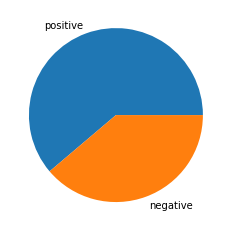

In [39]:
posi=0
nega=0
for i in range (0,len(df_final)):
    get_val=df_final['Comp'][i]
    if(float(get_val)<(0)):
        nega=nega+1
    if(float(get_val>(0))):
        posi=posi+1
posper=(posi/(len(df_final)))*100
negper=(nega/(len(df_final)))*100
print("% of positive tweets= ",posper)
print("% of negative tweets= ",negper)

arr=np.asarray([posper,negper], dtype=int)
plt.pie(arr,labels=['positive','negative'])
plt.plot()
plt.show()

In [40]:
df_final = df_final.groupby(df_final.Datetime.dt.floor('30min')).mean()

In [41]:
df_final

,Close,Comp,Negative,Neutral,Positive
Datetime,,,,,
2021-02-16 09:30:00,51.389999,0.019568,0.074643,0.839857,0.085500
2021-02-16 10:00:00,51.110001,0.067708,0.078500,0.835042,0.086542
2021-02-16 10:30:00,50.500000,0.089787,0.089367,0.817800,0.092800
2021-02-16 11:00:00,50.000000,0.083828,0.088160,0.822800,0.089040
2021-02-16 11:30:00,49.610001,0.012965,0.086500,0.828192,0.085385
...,...,...,...,...,...
2021-03-12 13:30:00,275.140015,0.091451,0.066717,0.831925,0.101396
2021-03-12 14:00:00,273.600006,0.180812,0.063955,0.788388,0.147672
2021-03-12 14:30:00,278.700012,0.091040,0.059244,0.838900,0.101856


In [42]:
df_final = df_final.drop(columns=['Negative','Neutral','Positive'])
df_final

,Close,Comp
Datetime,,
2021-02-16 09:30:00,51.389999,0.019568
2021-02-16 10:00:00,51.110001,0.067708
2021-02-16 10:30:00,50.500000,0.089787
2021-02-16 11:00:00,50.000000,0.083828
2021-02-16 11:30:00,49.610001,0.012965
...,...,...
2021-03-12 13:30:00,275.140015,0.091451
2021-03-12 14:00:00,273.600006,0.180812
2021-03-12 14:30:00,278.700012,0.091040


In [43]:
from sklearn import preprocessing

x = df_final.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df

,0,1
0,0.043599,0.376246
1,0.042645,0.410410
2,0.040566,0.426078
3,0.038861,0.421849
4,0.037532,0.371560
...,...,...
232,0.806340,0.427259
233,0.801091,0.490676
234,0.818476,0.426968
235,0.793864,0.417140


In [44]:
df = df.set_index(df_final.index)

In [45]:
result = df_final.join(df)
result

,Close,Comp,0,1
Datetime,,,,
2021-02-16 09:30:00,51.389999,0.019568,0.043599,0.376246
2021-02-16 10:00:00,51.110001,0.067708,0.042645,0.410410
2021-02-16 10:30:00,50.500000,0.089787,0.040566,0.426078
2021-02-16 11:00:00,50.000000,0.083828,0.038861,0.421849
2021-02-16 11:30:00,49.610001,0.012965,0.037532,0.371560
...,...,...,...,...
2021-03-12 13:30:00,275.140015,0.091451,0.806340,0.427259
2021-03-12 14:00:00,273.600006,0.180812,0.801091,0.490676
2021-03-12 14:30:00,278.700012,0.091040,0.818476,0.426968


In [46]:
result = result.rename(columns={0: 'normalised_close', 1: 'normalised_comp'})
result

,Close,Comp,normalised_close,normalised_comp
Datetime,,,,
2021-02-16 09:30:00,51.389999,0.019568,0.043599,0.376246
2021-02-16 10:00:00,51.110001,0.067708,0.042645,0.410410
2021-02-16 10:30:00,50.500000,0.089787,0.040566,0.426078
2021-02-16 11:00:00,50.000000,0.083828,0.038861,0.421849
2021-02-16 11:30:00,49.610001,0.012965,0.037532,0.371560
...,...,...,...,...
2021-03-12 13:30:00,275.140015,0.091451,0.806340,0.427259
2021-03-12 14:00:00,273.600006,0.180812,0.801091,0.490676
2021-03-12 14:30:00,278.700012,0.091040,0.818476,0.426968


In [48]:
result.corr()

,Close,Comp,normalised_close,normalised_comp
Close,1.000000,0.223577,1.000000,0.223577
Comp,0.223577,1.000000,0.223577,1.000000
normalised_close,1.000000,0.223577,1.000000,0.223577
normalised_comp,0.223577,1.000000,0.223577,1.000000


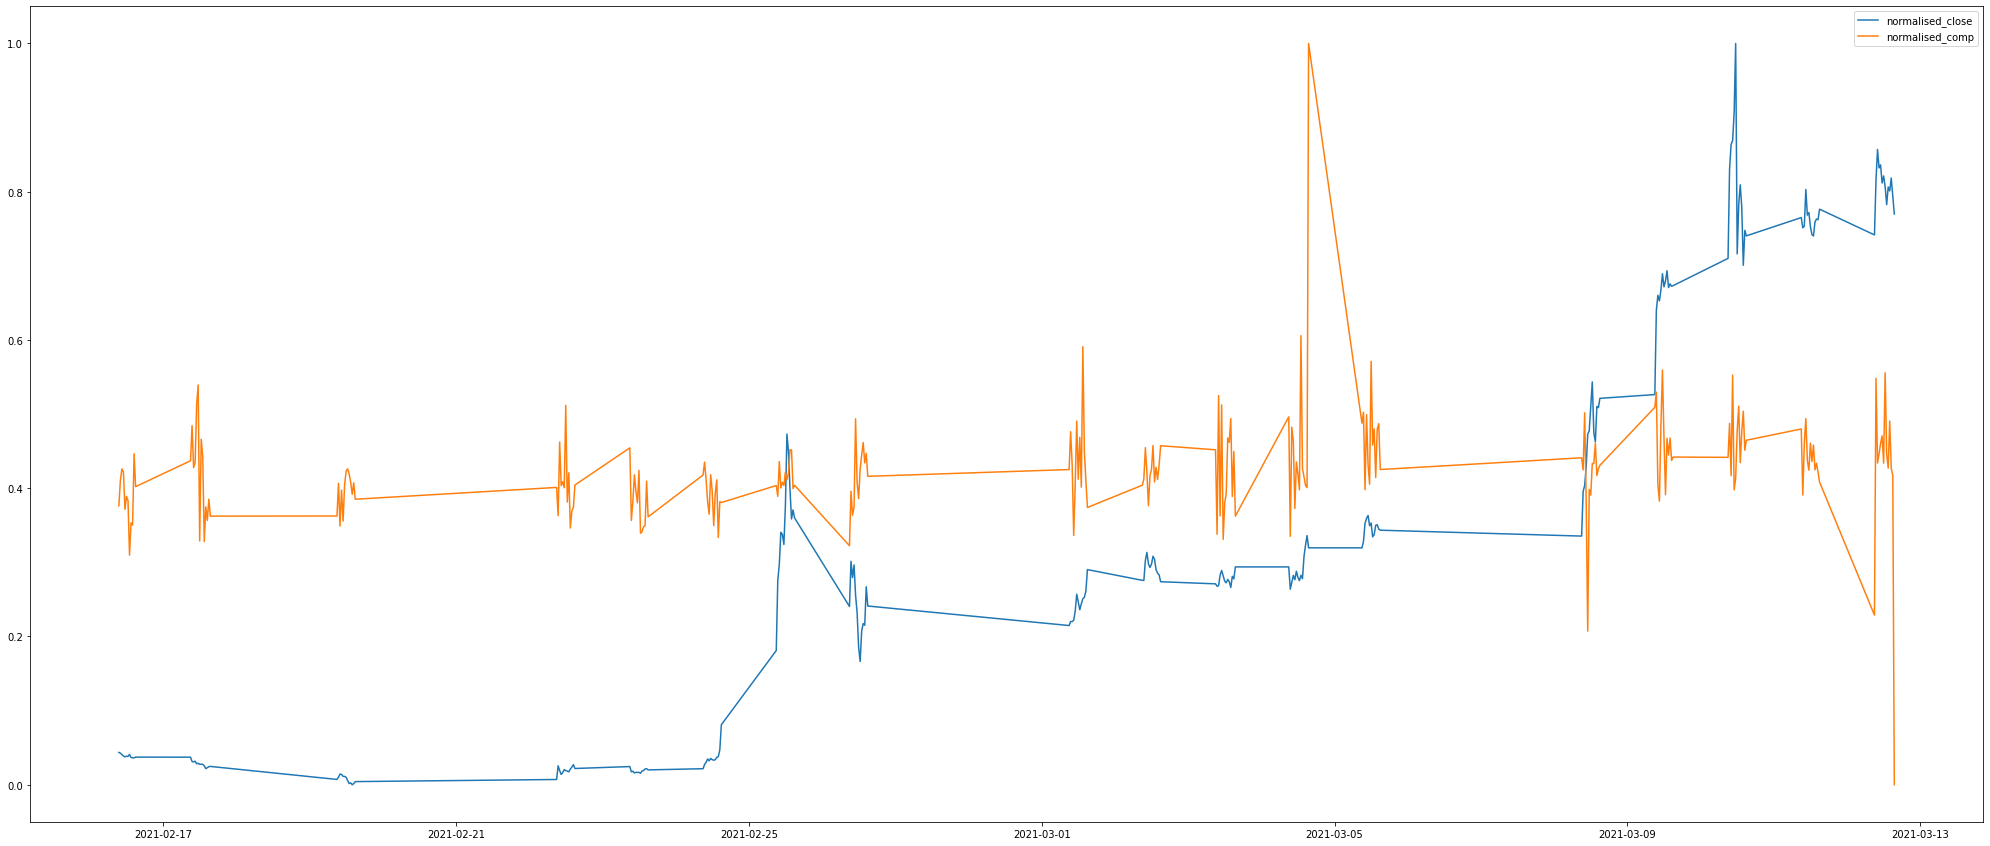

In [51]:
#Plot graphs
fig = plt.figure(figsize=(35,15))
plt.plot(result.index,result['normalised_close'], label = "normalised_close")
plt.plot(result.index,result['normalised_comp'], label = "normalised_comp")
plt.legend()
plt.show()

In [63]:
corr = result.corr()
correlation = (corr['Close'][-1])
counter = 0
while (abs(correlation)<0.5):
  counter = counter - 1
  if counter == len(result):
    break
  else:
    result['Close'] = result['Close'].shift(counter)
  corr = result.corr()
  correlation = (corr['Close'][-1])

In [64]:
result

,Close,Comp,normalised_close,normalised_comp
Datetime,,,,
2021-02-16 09:30:00,268.179901,0.019568,0.043599,0.376246
2021-02-16 10:00:00,275.140015,0.067708,0.042645,0.410410
2021-02-16 10:30:00,273.600006,0.089787,0.040566,0.426078
2021-02-16 11:00:00,278.700012,0.083828,0.038861,0.421849
2021-02-16 11:30:00,271.480011,0.012965,0.037532,0.371560
...,...,...,...,...
2021-03-12 13:30:00,NaN,0.091451,0.806340,0.427259
2021-03-12 14:00:00,NaN,0.180812,0.801091,0.490676
2021-03-12 14:30:00,NaN,0.091040,0.818476,0.426968


In [65]:
result.corr()

,Close,Comp,normalised_close,normalised_comp
Close,1.000000,0.685716,0.007054,0.685716
Comp,0.685716,1.000000,0.223577,1.000000
normalised_close,0.007054,0.223577,1.000000,0.223577
normalised_comp,0.685716,1.000000,0.223577,1.000000


In [66]:
final_result = result.dropna()
final_result

,Close,Comp,normalised_close,normalised_comp
Datetime,,,,
2021-02-16 09:30:00,268.179901,0.019568,0.043599,0.376246
2021-02-16 10:00:00,275.140015,0.067708,0.042645,0.410410
2021-02-16 10:30:00,273.600006,0.089787,0.040566,0.426078
2021-02-16 11:00:00,278.700012,0.083828,0.038861,0.421849
2021-02-16 11:30:00,271.480011,0.012965,0.037532,0.371560
2021-02-16 12:00:00,264.458893,0.037552,0.038515,0.389009


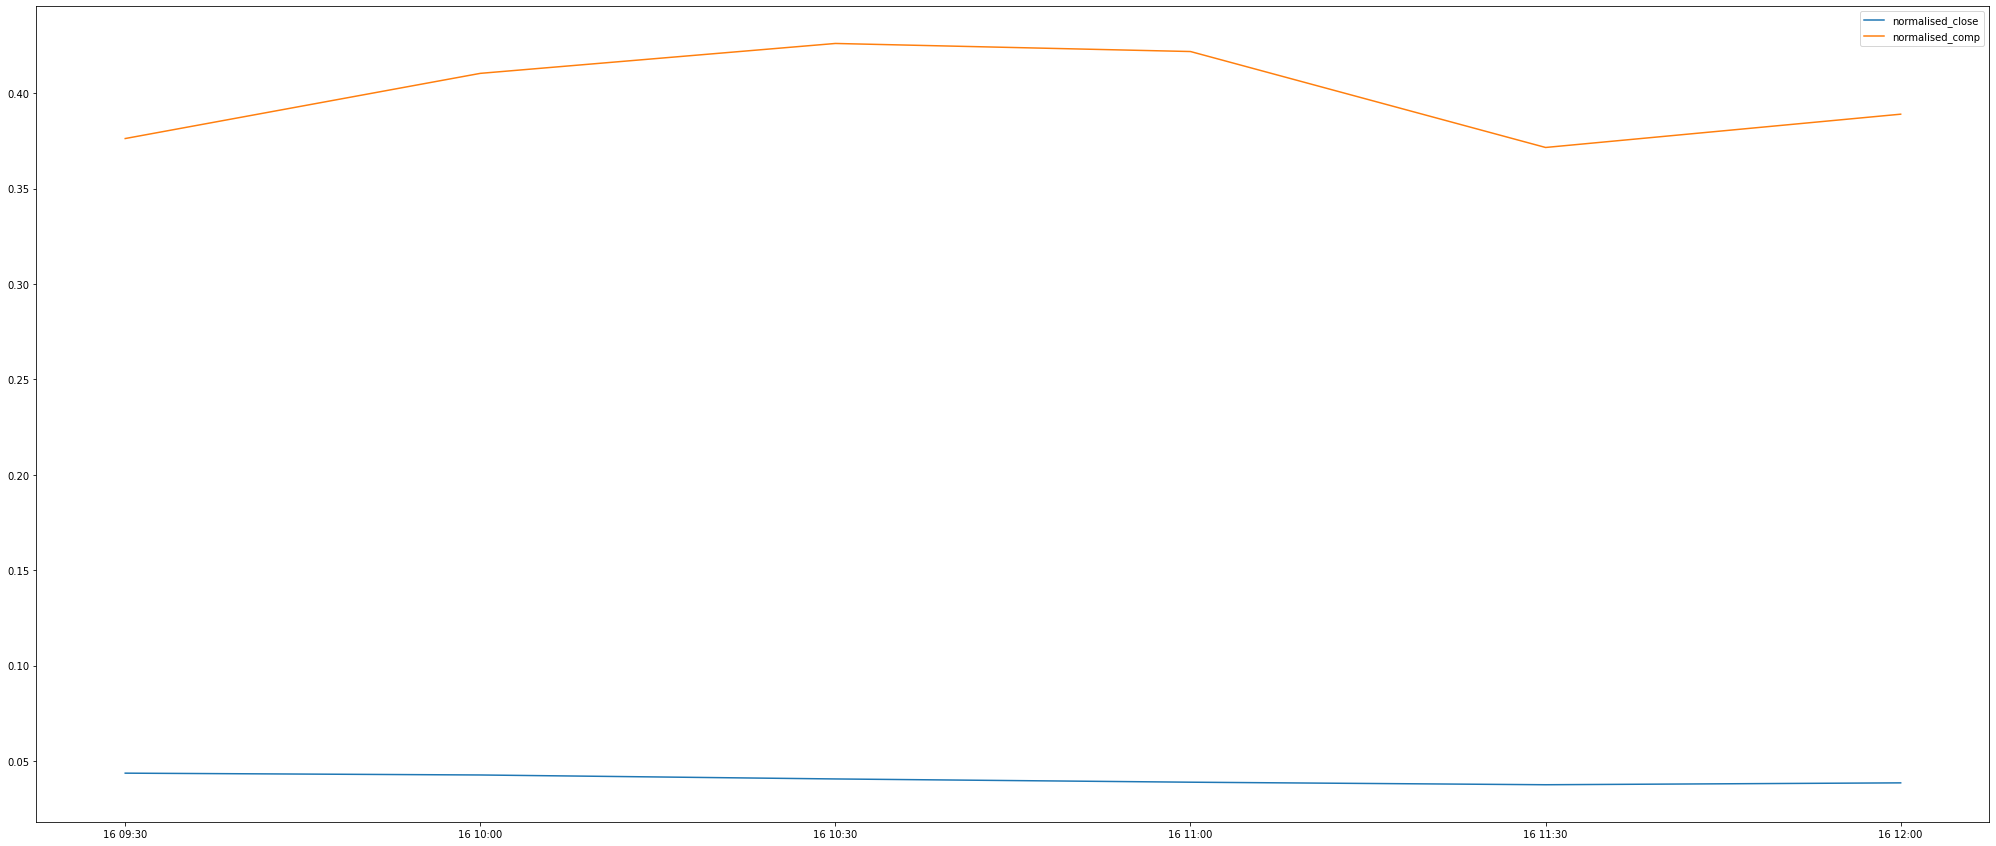

In [68]:
#Plot graphs
fig = plt.figure(figsize=(35,15))
plt.plot(final_result.index,final_result['normalised_close'], label = "normalised_close")
plt.plot(final_result.index,final_result['normalised_comp'], label = "normalised_comp")
plt.legend()
plt.show()